In [39]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.image as mpimg
import cv2

%matplotlib inline

In [60]:
def load_img_as_rgb(path):
    rgb = cv2.imread(path)
    print('shape of rgb: {} from Type: {}'.format(rgb.shape, type(rgb)))
    mp.imshow(rgb)
    
    return rgb

In [41]:
#create black and white image
def create_black_white_img(size):
    black_white = np.random.randint(2, size=(size[0], size[1]))
    black_white = black_white*255
    
    mp.imshow(black_white, cmap='gray')
    print('shape of black_white: {}'.format(black_white.shape))
    #print('black_white : {}'.format(black_white))
    
    return black_white

In [42]:
#create grayscale imagesize
def create_grayscale_img(size):
    grayscale = np.random.randint(256, size=(size[0], size[1]))
    
    mp.imshow(grayscale, cmap='gray')
    print('shape of grayscale: {}'.format(grayscale.shape))
    #print('grayscale : {}'.format(grayscale))
    
    return grayscale

In [65]:
#create rgb image
def create_rgb_img(size):
    rgb = np.random.randint(256, size=(size[0], size[1], size[2]))
    
    mp.imshow(rgb)
    print('shape of rgb: {} from Type: {}'.format(rgb.shape, type(rgb)))
    #print('rgb : {}'.format(rgb))
    
    return rgb

In [44]:
#convert to greyscale all colors equal weight
def to_gray_eq(rgb):
    gray_eq = np.dot(rgb[..., :3], [0.3333, 0.3333, 0.3333])
    gray_eq = np.round(gray_eq, decimals=0)
        
    mp.imshow(gray_eq, cmap='gray')
    print('shape of gray_eq : {}'.format(gray_eq.shape))
    #print('gray_eq : {}'.format(gray_eq))
    
    return gray_eq

In [45]:
#convert to greyscale all colors special weight
def to_gray_wi(rgb):
    gray_wi = np.dot(rgb[... , :3], [0.299, 0.587, 0.114])
    gray_wi = np.round(gray_wi, decimals=0)
        
    mp.imshow(gray_wi, cmap='gray')
    print('shape of gray_wi : {}'.format(gray_wi.shape))
    #print('gray_wi : {}'.format(gray_wi))
    
    return gray_wi

In [46]:
def to_canny(rgb):
    canny = cv2.Canny(rgb, 0, 255)
    mp.imshow(canny, cmap='gray')
    print('shape of canny : {}'.format(canny.shape))
    print('canny : {}'.format(canny))
    return canny

In [58]:
def to_binary(rgb):
    binary = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    print('shape of binary : {}'.format(binary.shape))
    print('binary : {}'.format(binary))

In [85]:
def is_patch_empty(image):
    """
    Tests whether an image patch has enough content or not
    :param image: image patch to test
    :return: True for empty. False for enough content
    """

    treshhold = 0.98
    
    # create a gray histogram
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print('shape of image : {} shape of gray : {}'.format(image.shape, gray.shape))
    
    pixel_amount = gray.shape[0]*gray.shape[1]
    relevant_pixel = (gray < 180).sum()
    
    print('pixel total : {} pixel relevant: {} relevant portion: {}'.format(pixel_amount, relevant_pixel, 1-(relevant_pixel/pixel_amount)))
    
    return treshhold < 1-(relevant_pixel/pixel_amount)
   

    

shape of rgb: (511, 808, 3) from Type: <class 'numpy.ndarray'>
shape of image : (511, 808, 3) shape of gray : (511, 808)
pixel total : 412888 pixel relevant: 16527 relevant portion: 0.9599721958497219


False

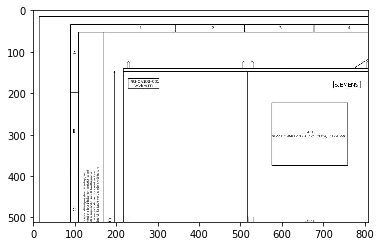

In [86]:
img = load_img_as_rgb('data/processed/classification_data_small/Etechnik/img_0_0_0.jpg')
is_patch_empty(img)